# Global Snow Sensor Classifications
plot area calculations for images processed in GEE

**Victoria Ly** (University of Washington)

***
#### Google Earth Engine: 
- [Global Sensor Classifications from Google Earth Engine](https://code.earthengine.google.com/9d87f13249d1d48a6f130e100c17f12a)

In [1]:
import xarray as xr
import rasterio as rio
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import rasterio.plot
import os
from datetime import datetime as dt
import matplotlib.dates as mdates

%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set working directory
import os
os.chdir('C:\\Users\\vicki\\globalsnowmaps\\GlobSnow_SWE_monthly')
os.getcwd()

'C:\\Users\\vicki\\globalsnowmaps\\GlobSnow_SWE_monthly'

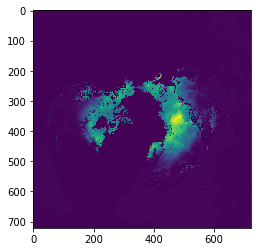

In [3]:
# Globsnow SWE for January [mm]
import rasterio
from matplotlib import pyplot

swemonth1 = "..\\GlobSnow_SWE_monthly/GlobSnow_SWE_L3B_month01_avg.tif"
src = rasterio.open(swemonth1)
pyplot.imshow(src.read(1), cmap='viridis')
pyplot.show()

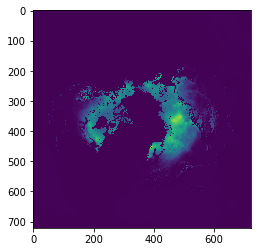

In [5]:
swemonth2 = "..\\GlobSnow_SWE_monthly/GlobSnow_SWE_L3B_month02_avg.tif"
src2 = rasterio.open(swemonth2)
pyplot.imshow(src2.read(1), cmap='viridis')

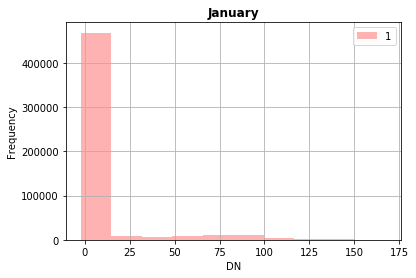

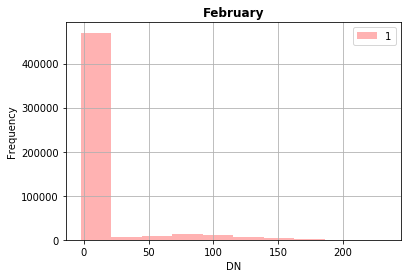

In [7]:
from rasterio.plot import show_hist
show_hist(src, bins=10, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="January" )
show_hist(src2, bins=10, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="February")


***
### Set up Google Earth Engine API

In [13]:
# Import libraries.
import ee

from IPython.display import Image
import matplotlib.pyplot as plt
import rasterio
import xarray as xr
import numpy as np


In [9]:
# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

Enter verification code: 4/wQFCgxfkKcit5g8iuwEIDKEYdW2ppkgkD4GXYhgAPd6WQHl_MMfzTzs

Successfully saved authorization token.


In [11]:
#img = ee.Image('LANDSAT/LT05/C01/T1_SR/LT05_034033_20000913')

In [49]:
#import an exported asset 
#img = ee.Image('users/victorialy/GlobSnow_SWE_L3B_month01_avg')
img = ee.Image('users/victorialy/test_classify_month01_mtnmasked')

In [50]:
print(img.getInfo())

{'type': 'Image', 'bands': [{'id': 'class', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 255}, 'dimensions': [1604, 545], 'crs': 'EPSG:4326', 'crs_transform': [0.22457882102988036, 0, -180.11221446596406, 0, -0.22457882102988036, 79.27632382354777]}], 'version': 1580845696422305, 'id': 'users/victorialy/test_classify_month01_mtnmasked', 'properties': {'system:footprint': {'type': 'LinearRing', 'coordinates': [[-180, -90], [180, -90], [180, 90], [-180, 90], [-180, -90]]}, 'system:asset_size': 68851}}


In [51]:
#convert to array
data = np.array(img.get('class'))


In [59]:
sampFC = img.select(['class'])
#sampDict = sampFC.reduceColumns(ee.Reducer.toList().repeat(2), 'class')